<center>
    <img src="https://sbu.ac.ir/documents/46019/275501/logo-dark.png" alt="sbu" class="center">
</center>


# <center>Data Mining Course - Project #3</center>
<center>
    <b>Professors:</b>
    <br>
Dr. Farahani, Dr. Kheradpishe
    <br><br><br>
Ali Nikkhah - 99422197
    <br><br>
May 2021
    <br><br>
</center>


# 1.

<div style="direction:rtl; font-family:Vazir;font-size:16px;">
 
الگوریتم های SVM از مجموعه ای از توابع ریاضی که به عنوان کرنل تعریف می شوند، استفاده می کنند. وظیفه کرنل این است که داده ها را به عنوان ورودی گرفته و آن ها را به شکل مورد نیاز تبدیل کند. الگوریتم های مختلف SVM ، از انواع مختلف توابع کرنل استفاده می کنند. این توابع می توانند انواع متفاوتی داشته باشند. به عنوان مثال خطی ، غیرخطی ، چند جمله ای ، تابع پایه شعاعی (RBF) و سیگموئید.
<br></br>
توابع کرنل ، برای داده های ترتیبی ، نمودار ها ، متن ها ، تصاویر و همچنین بردار ها معرفی می شوند. پرکاربردترین نوع تابع کرنل، RBF است. زیرا دارای پاسخ محلی و متناهی در کل بازه محور x است.
 اما از لحاظ محاسباتی، محاسبه همه فیچر های اضافه مخصوصا در ترینینگ ست های بزرگ، هزینه زیادی دارد.
<br></br>
توابع کرنل ، ضرب داخلی بین دو نقطه در یک فضای ویژگی مناسب را برمی گردانند. بنابراین ، با هزینه محاسباتی کم، حتی در فضاهای با ابعاد بالا، مفهومی از شباهت را تعریف می کنند.
<br></br>
<b>کرنل چند جمله ای</b>
<br></br>
این کرنل در پردازش تصویر پرکاربرد است. معادله آن به صورت زیر است :
<br>
$$k(x_i,x_j)=(x_i\cdot x_j+1)^d$$
<br></br>
که در آن d درجه چند جمله ای است.
<br></br>
<b>کرنل گاوسی</b>
<br></br>
این کرنل برای اهداف عمومی است. و هنگامی که هیچ دانش پیشینی در مورد داده ها وجود ندارد استفاده می شود. معادله آن به صورت زیر است :
<br></br>
$$k(x,y)=exp(-\frac{\left \| x-y \right \|^{2}}{2\sigma ^{2}})$$
<br></br>
<b>تابع پایه شعاعی گاوسی (RBF)</b>
<br></br>
این کرنل برای اهداف عمومی کاربرد دارد. و هنگامی که هیچ دانش پیشینی در مورد داده ها وجود نداشته باشد، مورد استفاده قرار می گیرد. معادله آن به صورت زیر است :
<br></br>
$$k(x_i,x_j)=exp(-\gamma \left \| x_i - x_j \right \|^{2})$$
<br></br>
و برای
<br>
$$\gamma > 0$$
<br>
گاهی اوقات با استفاده از پارامتر زیر استفاده می شود :
<br></br>
$$\gamma = \frac{1}{2\sigma ^{2}}$$
<br></br>
<b>کرنل RBF لاپلاس</b>
<br></br>
این هم یک کرنل برای اهداف عمومی است. و هنگامی که هیچ دانش پیشینی در مورد داده ها وجود ندارد استفاده می شود. معادله آن به صورت زیر است :
<br></br>
$$k(x,y)=exp(-\frac{\left \| x-y \right \|}{\sigma })$$
<br></br>
<b>کرنل سیگموئید</b>
<br></br>
می توان این کرنل را در شبکه های عصبی مورد استفاده قرار داد. معادله مربوط به آن عبارت است از :
<br></br>
$$k(x,y)=\tanh(\alpha x^{T}y+c)$$
<br></br>
<b>کرنل spline خطی بصورت یک بعدی</b>
<br></br>
این کرنل، هنگام کار با بردارهای بزرگ داده پراکنده ، کاربرد زیادی دارد. این کرنل اغلب در دسته بندی متن مورد استفاده قرار می گیرد. کرنل spline همچنین در مسائل رگرسیون عملکرد خوبی دارد. معادله آن عبارت است از :
<br></br>
$$k(x,y)=1+xy+xy \ min(x,y) -\frac{x+y}{2} \ min(x,y)^{2} + \frac{1}{3} \ min(x,y)^{3}$$
<br></br>


</div>

# 2.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [114]:
mobile_test = pd.read_csv("test.csv")
mobile_train = pd.read_csv("train.csv")

display(mobile_train.shape)
mobile_train.head(10)

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [115]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y = mobile_train["price_range"].values
x_data=mobile_train.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

svc=SVC(random_state=1)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)
accuracy = accuracy_score(y_test, svc_pred)

print("Accuracy : ", accuracy * 100)
print(classification_report(y_test,svc_pred))

Accuracy :  83.75
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.77      0.78      0.77        96
           2       0.74      0.81      0.77       106
           3       0.97      0.83      0.89       106

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



# 3 & 4.

C > 0 : soft margin
<br>
more larger C => more harder margin

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.



In [5]:
for g in [.1,.5,.10,.25,.50,1]:
    for c in [1, 3, 5, 10, 40, 60, 80, 100]:
        svc =  SVC(kernel="rbf", C=c, gamma=g)
        svc.fit(x_train, y_train)
        svc_pred = svc.predict(x_test)
        svc_acc_score = accuracy_score(y_test, svc_pred)

        accuracy = accuracy_score(y_test, svc_pred)
        print("C=", c)
        print("Gamma=", g)
        print("Accuracy : ", accuracy * 100)

        print(classification_report(y_test,svc_pred))

C= 1
Gamma= 0.1
Accuracy :  87.5
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        92
           1       0.82      0.89      0.85        96
           2       0.79      0.84      0.81       106
           3       0.98      0.83      0.90       106

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

C= 3
Gamma= 0.1
Accuracy :  90.75
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        92
           1       0.86      0.91      0.88        96
           2       0.85      0.89      0.87       106
           3       0.98      0.89      0.93       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

C= 5
Gamma= 0.1
Accuracy :  91.25
              precision    re

In [6]:
for c in [1, 3, 5, 10, 40, 60, 80, 100, 1e10]:
    svc =  SVC(kernel="linear", C=c)
    svc.fit(x_train, y_train)
    svc_pred = svc.predict(x_test)
    svc_acc_score = accuracy_score(y_test, svc_pred)

    accuracy = accuracy_score(y_test, svc_pred)
    print("C=", c)
    print("Accuracy : ", accuracy * 100)

    print(classification_report(y_test,svc_pred))

C= 1
Accuracy :  93.0
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.90      0.92      0.91        96
           2       0.88      0.91      0.89       106
           3       0.98      0.92      0.95       106

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

C= 3
Accuracy :  94.5
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.92      0.94      0.93        96
           2       0.91      0.92      0.91       106
           3       0.98      0.94      0.96       106

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.94      0.95       400

C= 5
Accuracy :  95.25
              precision    recall  f1-score   support

        

In [7]:
for g in [.1,.5,.10,.25,.50,1]:
    for c in [1, 3, 5, 10, 40, 60, 80, 100]:
        svc =  SVC(kernel="poly", C=c, gamma=g)
        svc.fit(x_train, y_train)
        svc_pred = svc.predict(x_test)
        svc_acc_score = accuracy_score(y_test, svc_pred)

        accuracy = accuracy_score(y_test, svc_pred)
        print("C=", c)
        print("Gamma=", g)
        print("Accuracy : ", accuracy * 100)

        print(classification_report(y_test,svc_pred))

C= 1
Gamma= 0.1
Accuracy :  80.0
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        92
           1       0.74      0.72      0.73        96
           2       0.69      0.78      0.73       106
           3       0.98      0.75      0.85       106

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400

C= 3
Gamma= 0.1
Accuracy :  85.25
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        92
           1       0.81      0.82      0.82        96
           2       0.76      0.85      0.80       106
           3       0.98      0.80      0.88       106

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.86      0.85      0.85       400

C= 5
Gamma= 0.1
Accuracy :  86.0
              precision    rec

# 5.
   ### A.

In [116]:
minimum = mobile_train['battery_power'].min()
maximum = mobile_train['battery_power'].max()

mobile_train_binned = mobile_train.copy()
bins = np.linspace(minimum, maximum, 4)
labels = [0, 1, 2]
mobile_train_binned['battery_power'] = pd.cut(mobile_train['battery_power'], bins=bins, labels=labels, include_lowest=True)
mobile_train_binned.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,0,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,0,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,2,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,2,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,2,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,2,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,0,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### B.

One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

For example, some vectors may be optimal for regression (approximating functions based on former return values), and some may be optimal for classification (categorization into fixed sets/classes, typically binary):

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Normalizing the data
sc = StandardScaler()
X=mobile_train.iloc[:,:-1].values
y=mobile_train.iloc[:,20:21].values
X = sc.fit_transform(X)
# One Hot Encoder
ohe=OneHotEncoder()
y=ohe.fit_transform(y).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

### C.

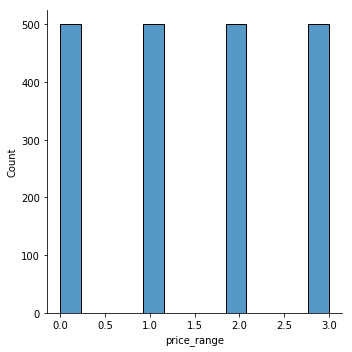

In [93]:

# Check Distribution of price_range
sns.displot(mobile_train['price_range'])


price_range is normally distributed! So no need to transformation.

The log transform is a specific example of a family of transformations known as power transforms. In statistical terms, these are variance-stabilizing transformations.
We can apply a power transform directly by calculating the log or square root of the variable, although this may or may not be the best power transform for a given variable.

There are two popular approaches for such automatic power transforms; they are:

    Box-Cox Transform
    Yeo-Johnson Transform

We can use this methods when data is skewed.

but there is no skewed feature: 

In [94]:
skew_features = mobile_train[num_feets].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})
skewness


,Skew
fc,1.019811
px_height,0.666271
sc_w,0.633787
clock_speed,0.178084
m_dep,0.089082
int_memory,0.057889
battery_power,0.031898
blue,0.020016
pc,0.017306
px_width,0.014787


### C.

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

m_dep: Mobile Depth in cm

In [148]:
mobile_train_extended = mobile_train.copy()

mobile_train_extended['aria'] = mobile_train['sc_h'] * mobile_train['sc_w']
mobile_train_extended['aria']

0        63
1        51
2        22
3       128
4        16
       ... 
1995     52
1996    110
1997      9
1998    180
1999     76
Name: aria, Length: 2000, dtype: int64

In [149]:
mobile_train_extended['volume'] = mobile_train['sc_h'] * mobile_train['sc_w'] * mobile_train['m_dep']
mobile_train_extended['volume']

0        37.8
1        35.7
2        19.8
3       102.4
4         9.6
        ...  
1995     41.6
1996     22.0
1997      6.3
1998     18.0
1999     68.4
Name: volume, Length: 2000, dtype: float64

In [150]:
mobile_train_extended

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,aria,volume
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,63,37.8
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,51,35.7
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,22,19.8
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,128,102.4
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,16,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,52,41.6
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,110,22.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,9,6.3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,180,18.0


# 6.

In [151]:
y = mobile_train_binned["price_range"].values
x_data=mobile_train_binned.drop(["price_range"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=1)

svc=SVC(random_state=1)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)
accuracy = accuracy_score(y_test, svc_pred)

print("binning method on 'battery power'\n")
print("Accuracy : ", accuracy * 100)
print(classification_report(y_test,svc_pred))

binning method on 'battery power'

Accuracy :  76.25
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        92
           1       0.67      0.75      0.71        96
           2       0.68      0.67      0.67       106
           3       0.86      0.80      0.83       106

    accuracy                           0.76       400
   macro avg       0.77      0.76      0.77       400
weighted avg       0.77      0.76      0.76       400



In [152]:
y = mobile_train_extended["price_range"].values
x_data=mobile_train_extended.drop(["price_range"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=1)

svc=SVC(random_state=1)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)
accuracy = accuracy_score(y_test, svc_pred)

print("SVC on extended dataset\n")
print("Accuracy : ", accuracy * 100)
print(classification_report(y_test,svc_pred))

SVC on extended dataset

Accuracy :  94.5
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       0.92      0.95      0.93        96
           2       0.92      0.91      0.91       106
           3       0.97      0.94      0.96       106

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.94      0.94       400



In [153]:
mobile_train_combined = mobile_train_extended
mobile_train_combined['battery_power'] = mobile_train_binned['battery_power']
mobile_train_combined

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,aria,volume
0,0,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,63,37.8
1,1,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,51,35.7
2,0,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,22,19.8
3,0,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,128,102.4
4,2,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,16,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,52,41.6
1996,2,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,110,22.0
1997,2,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,9,6.3
1998,2,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,180,18.0


In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y = mobile_train_combined["price_range"].values
x_data=mobile_train_combined.drop(["price_range"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

svc=SVC(random_state=1)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)
accuracy = accuracy_score(y_test, svc_pred)

print("SVC on combined dataset\n")
print("Accuracy : ", accuracy * 100)
print(classification_report(y_test,svc_pred))

SVC on combined dataset

Accuracy :  83.75
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.77      0.78      0.77        96
           2       0.74      0.81      0.77       106
           3       0.97      0.83      0.89       106

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



So, Best __Accuracy is %94.5__ for extended dataset.

Best Regards.